<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/Linear-Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [5]:
from __future__ import division, print_function
import pandas as pd
import os 
import numpy as np
import requests
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
name = ['sepal-length','sepal-width','petal-length','petal-width','species']
def download_data(path):
  filename = (path.split('/')[-1])
  dir = os.path.join(os.path.abspath(os.path.dirname(filename)))
  r = requests.get(path,allow_redirects=True, stream = True,verify = False)
  if r.status_code == 200:    
    with open(dir + '/' + filename ,'wb') as f:
      f.write(r.content)
download_data(data)
print(os.path.join(data + '.csv'))
iris = pd.read_csv(data,names = name)
#gradient descent : theta + 1 = theta_ 0 + (lr*loss_function ) * x(i)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.csv


In [0]:
# chia data
y = data.variety
X = data.drop('variety',axis = 1)
X = X.values

In [0]:
# ma hoa data thanh cac con so
def chuanhoa(datasets):
  s = y.unique()
  label = pd.factorize(s)
  datasets = datasets.replace(label[1],label[0])
  return datasets
y = chuanhoa(y)
y = y.values

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# ax = sns.relplot(x="sepal-length", y="sepal-width",hue = 'variety',style = 'variety',
#                      kind ='line', data=data,col='variety')
# ax.fig.autofmt_xdate()


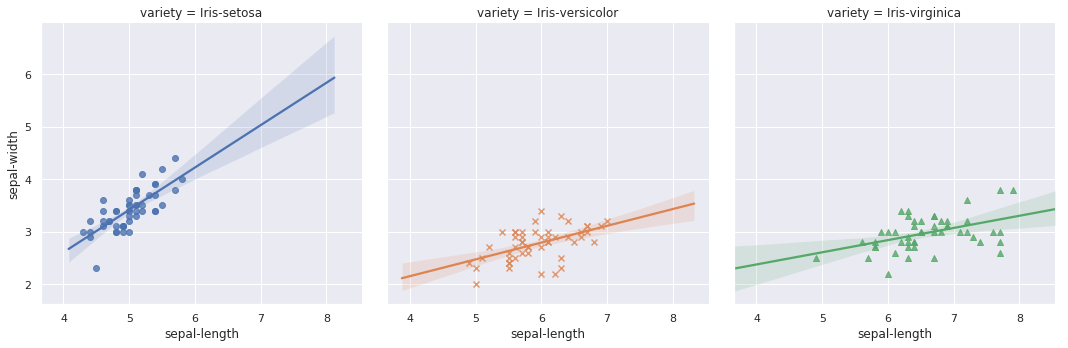

In [0]:
from __future__ import print_function
from scipy import stats
from scipy.stats import norm
g = sns.lmplot(x='sepal-length',y='sepal-width',hue='variety',
               col='variety',
               markers=['o','x','^'],data=data)


In [0]:
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)
print('w',w)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

w [-0.10355176 -0.00451914  0.25713403  0.5567036 ]
X_train (112, 4)
X_test (38, 4)
y_train (112,)
y_test (38,)


In [0]:
A = np.dot(X_train.T,X_train)
b = np.dot(X_train.T,y_train)
w = np.dot(np.linalg.pinv(A),b)
X_train.shape[1]
def compute_mse(X,y,w):
  summands = np.power(X * w.T - y,2)
  return np.sum(summands)/(2 * len(X))
def gradient_descent(X,y,lr,epochs):
  num_parame = X.shape[1]
  theta = np.matrix([0.0 for i in range(num_parame)])
  cost = [0.0 for i in range(epochs)]
  
  for it in range(epochs):
    error = np.repeat((X * theta.T)- y,num_parame,axis = 1)
    error_der = np.sum(np.matmul(error.T,X),axis = 0)
    theta = theta - ( lr / len(y)) * error_der
    # cap nhap trong so
    cost[it] = compute_mse(X, y, theta)
  return theta,cost
gradient_descent(X_train,y_train,0.001,100)


(matrix([[-1.19432457e+142, -5.98483209e+141, -8.19599642e+141,
          -2.71018235e+141]]),
 [41897.71801554218,
  30454412.946870364,
  22157355081.253338,
  16120784165634.84,
  1.1728822398842322e+16,
  8.533410871983011e+18,
  6.208560299904039e+21,
  4.5170942282997325e+24,
  3.286452781598042e+27,
  2.3910884608087923e+30,
  1.7396580469453624e+33,
  1.2657039544567986e+36,
  9.208743655918754e+38,
  6.6999047780345875e+41,
  4.874576349606485e+44,
  3.546542133859018e+47,
  2.580318822630123e+50,
  1.877334309059653e+53,
  1.3658715648092498e+56,
  9.937522169340737e+58,
  7.23013418029031e+61,
  5.2603495493353654e+64,
  3.827214916235726e+67,
  2.7845248452943975e+70,
  2.025906248737079e+73,
  1.4739664239692015e+76,
  1.0723976098809579e+79,
  7.802325853403653e+81,
  5.676652778949155e+84,
  4.130100098125699e+87,
  3.0048917002275513e+90,
  2.186236148173273e+93,
  1.5906158931510117e+96,
  1.1572669867610675e+99,
  8.419800684839945e+101,
  6.125902180174195e+104,
  4.

In [0]:
model = LinearRegression()
model.fit(X_train,y_train)

pred = model.predict(X_test)
class_pred = pred/len(pred)

error_rate = 1- class_pred 

y_test = 1.0*y_test

optimizer = mean_squared_error(pred,y_test)
print(optimizer)
#accuracy_score(y_test,pred)

score = model.score(X_test,y_test)


#cross_val_score(X_test,y_test)
#cnf_matrix = confusion_matrix(y_test, pred)
#np.set_printoptions(precision=2)

0.0631199608911289


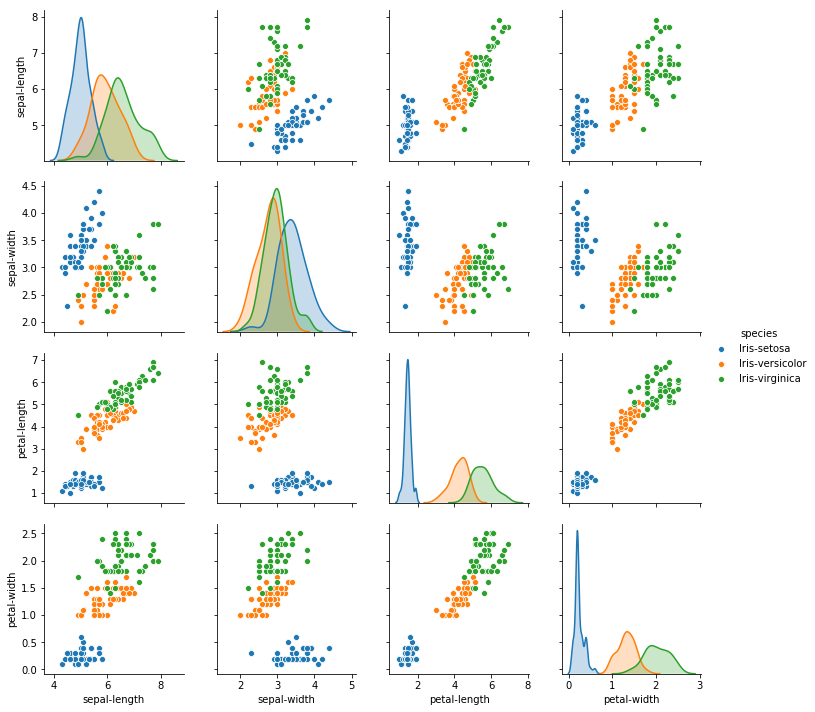

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data = iris, hue = 'species')
# visual toan bo data va hien thi tang truong

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


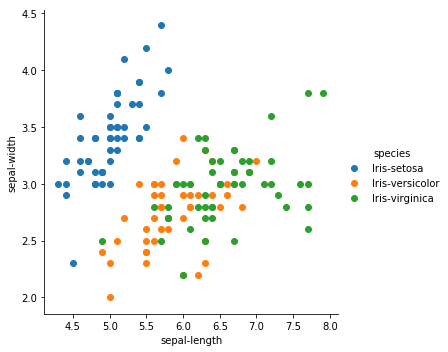

In [14]:
sns.FacetGrid(data = iris, hue= 'species', size = 5).map(plt.scatter,'sepal-length','sepal-width').add_legend()

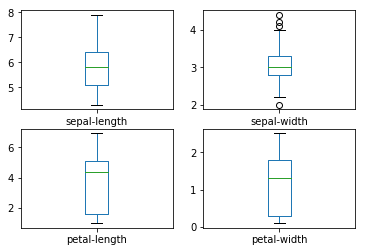

In [18]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.figure()

# danh gia muc do data roi vao khoang nao cua do thi

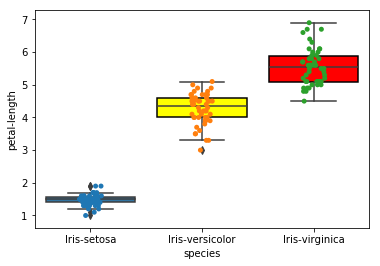

In [20]:
ax= sns.boxplot(x="species", y="petal-length", data=iris)
ax= sns.stripplot(x="species", y="petal-length", data=iris, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

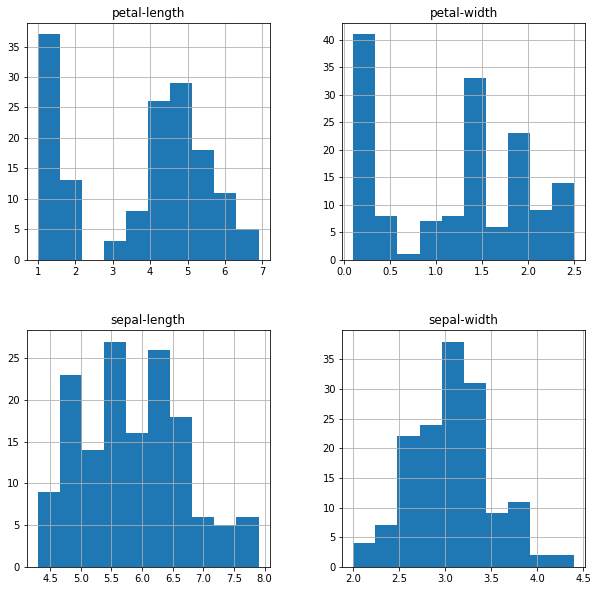

In [22]:
iris.hist(figsize = (10,10))
plt.show()

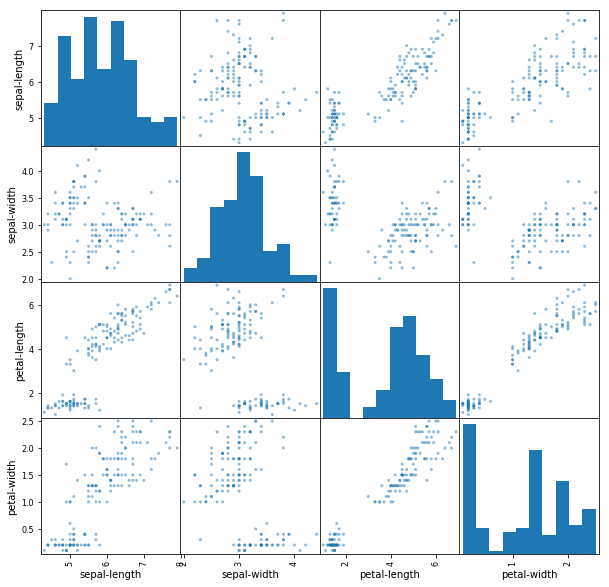

In [23]:
pd.plotting.scatter_matrix(iris, figsize = (10,10))
plt.figure()

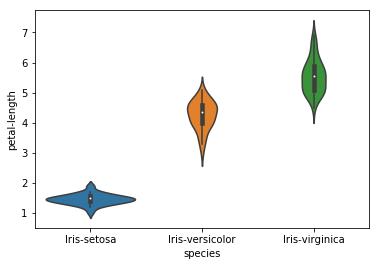

In [25]:
sns.violinplot(data=iris,x="species", y="petal-length")